In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('adult_with_headers (1).csv')
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Handling Missing Values

In [3]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [4]:
print("The dataset contains no missing values, so no imputation was required.")

The dataset contains no missing values, so no imputation was required.


#### Standard Scaler

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
num_cols = df.select_dtypes(include=['int64','float64']).columns
num_cols

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

In [7]:
scaler = StandardScaler()

In [8]:
df_ss = df.copy()

In [9]:
df_ss[num_cols] = scaler.fit_transform(df[num_cols])
df_ss[num_cols].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429


##### <font color='green'>Standard Scaling </font>

We use Standard Scaling when:                                                 
-> Data is normally distributed                                               
-> Using models that assume standardized data: Logistic Regression, Linear Regression, SVM, PCA                                                         
-> Outliers are present (less sensitive)  

Because, It centers data to mean = 0 and std = 1, helping linear/statistical models work better.

#### Min-Max Scaling

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
minmax_scaler = MinMaxScaler()

In [12]:
df_mm = df.copy()

In [13]:
df_mm[num_cols] = minmax_scaler.fit_transform(df[num_cols])
df_mm[num_cols].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.301370,0.044302,0.800000,0.02174,0.0,0.397959
1,0.452055,0.048238,0.800000,0.00000,0.0,0.122449
2,0.287671,0.138113,0.533333,0.00000,0.0,0.397959
3,0.493151,0.151068,0.400000,0.00000,0.0,0.397959
4,0.150685,0.221488,0.800000,0.00000,0.0,0.397959


#####  <font color='green'> MinMax Scaling </font>

We use Min-Max Scaling, when:                                                 
-> Using distance-based or neural network models:                           KNN, K-Means, Neural Networks                                                 
->You need all values between 0 and 1                                         
->Data is not normally distributed

Because, It preserves the shape of the data and converts everything to a fixed 0–1 range, which improves gradient stability and distance calculations.

### EDA

In [14]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [15]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

#### One-Hot Encoding

In [16]:
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')

In [17]:
low_cardinality = [col for col in cat_cols if df[col].nunique() < 5]
low_cardinality

['sex', 'income']

In [18]:
high_cardinality = [col for col in cat_cols if df[col].nunique() >=5]
high_cardinality

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'native_country']

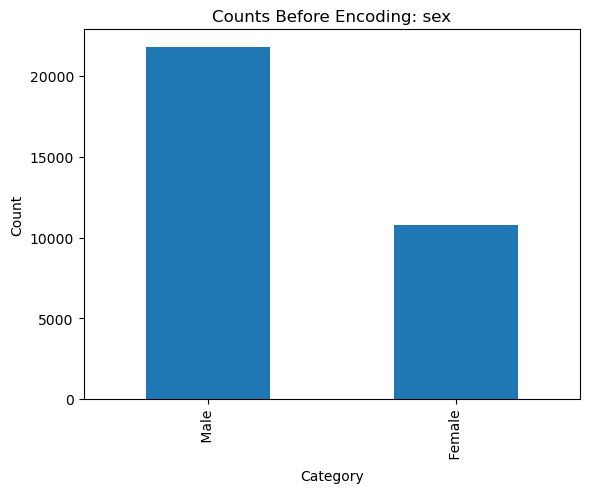

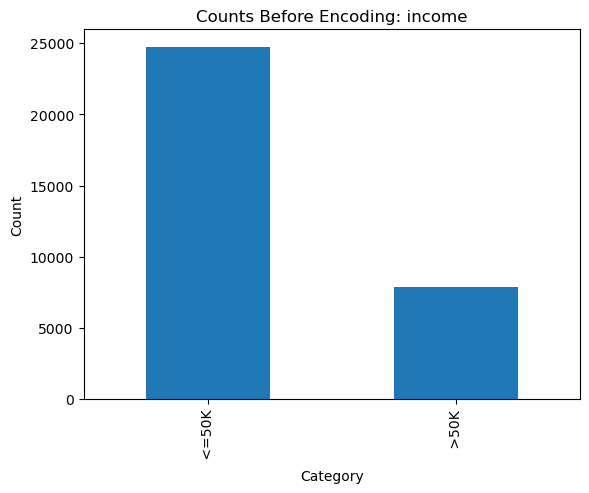

In [19]:
for col in low_cardinality:
    plt.figure()
    df[col].value_counts().plot(kind='bar')
    plt.title(f"Counts Before Encoding: {col}")
    plt.xlabel("Category")
    plt.ylabel("Count")
    plt.show()

In [20]:
onehot = pd.get_dummies(df, columns=low_cardinality, drop_first=True)

In [21]:
onehot.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Male,income_ >50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,2174,0,40,United-States,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,13,United-States,1,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,40,United-States,1,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,40,United-States,1,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,40,Cuba,0,0


#### <font color ='teal'>Pros</font>

->Categories are treated equally(No ordinal relationship assumed)               
->Works well for algorithms that cannot handle numeric category meaning         
example: Linear Regression, Logistic Regression, SVM, KNN                       
->Safe for low_cardinality Features(avoids misleading model behavior)

#### <font color ='teal'>Cons</font>

->If a column has many categories, it creates too many columns (high cardinality problem).                                                           
->Slows down training for large datasets.                                          ->They don’t need dummy variables; the extra columns add no benefit.

#### Label Encoding

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
df_le = onehot.copy()

In [24]:
label_encoder = LabelEncoder()

In [25]:
for col in high_cardinality:
    df_le[col] = label_encoder.fit_transform(df_le[col])

In [26]:
df_le.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Male,income_ >50K
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,1,0
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,1,0
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,1,0
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,1,0
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,0,0


#### <font color='teal'>Pros</font>

-> Simple and very fast                                                         
-> Suitable for high-cardinality columns                                        -> Best for tree-based models

#### <font color='teal'>Cons</font>

-> Implies an ordinal relationship                                             
Example:                                                                       
Dog=0, Cat=1, Horse=2                                                           
Model may mistakenly think Horse > Cat > Dog, which is incorrect.               
->Misleads linear models                                                                                                              ->Not suitable for algorithms sensitive to value magnitude

### FEATURE ENGINEERING

In [27]:
print(df.columns.tolist())


['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']


In [28]:
df['age_months'] = df['age'] * 12
df['age_months']

0        468
1        600
2        456
3        636
4        336
        ... 
32556    324
32557    480
32558    696
32559    264
32560    624
Name: age_months, Length: 32561, dtype: int64

###### <font color='teal'>Reason</font>
Created a more granular version of age, that helps model capture age differences more precisely.

In [29]:
df['work_hours_category'] = pd.cut(df['hours_per_week'],
                                   bins=[0, 20, 40, 60, 99],
                                   labels=['Low', 'Medium', 'High', 'Very High'])


###### <font color='teal'>Reason</font>
Grouped hours_per_week into levels (Low, Medium, High, Very High).             
Captures nonlinear income patterns based on working hours.

#### Log Transformation for Skewed Features

In [30]:
skew = df.select_dtypes(include='number').skew()
skew

age                0.558743
fnlwgt             1.446980
education_num     -0.311676
capital_gain      11.953848
capital_loss       4.594629
hours_per_week     0.227643
age_months         0.558743
dtype: float64

In [31]:
df['capital_gain_log'] = np.log1p(df['capital_gain'])
df['capital_loss_log'] = np.log1p(df['capital_loss'])

Applied log1p transformation to capital_gain & capital_loss due to high skewness.
Reduces extreme outliers and improves model performance.

In [36]:
print("Skewness before:")
print(df[['capital_gain', 'capital_loss']].skew())

print("\nSkewness after log:")
print(df[['capital_gain_log', 'capital_loss_log']].skew())


Skewness before:
capital_gain    11.953848
capital_loss     4.594629
dtype: float64

Skewness after log:
capital_gain_log    3.096144
capital_loss_log    4.307537
dtype: float64
